In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-crypto-currencies/crypto-markets.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates


# Default number of currencies we will look at at each step
x = 10

In [4]:
!pip install mplfinance

     |████████████████████████████████| 62 kB 351 kB/s eta 0:00:01


In [8]:
from mplfinance.original_flavor  import candlestick_ohlc

In [9]:
df = pd.read_csv("../input/all-crypto-currencies/crypto-markets.csv")

In [10]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


## Fields

* Open: price of the coin at the start of the trading day
* Close: price of the coin at the end of the trading day
* High: highest price in the trading day
* Low: lowest price in the trading day

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         942297 non-null  object 
 1   symbol       942297 non-null  object 
 2   name         942297 non-null  object 
 3   date         942297 non-null  object 
 4   ranknow      942297 non-null  int64  
 5   open         942297 non-null  float64
 6   high         942297 non-null  float64
 7   low          942297 non-null  float64
 8   close        942297 non-null  float64
 9   volume       942297 non-null  float64
 10  market       942297 non-null  float64
 11  close_ratio  942297 non-null  float64
 12  spread       942297 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


### Here the date is of type object, need to convert to date type

In [12]:
df['date'] = pd.to_datetime(df['date'],format = "%Y-%m-%d")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         942297 non-null  object        
 1   symbol       942297 non-null  object        
 2   name         942297 non-null  object        
 3   date         942297 non-null  datetime64[ns]
 4   ranknow      942297 non-null  int64         
 5   open         942297 non-null  float64       
 6   high         942297 non-null  float64       
 7   low          942297 non-null  float64       
 8   close        942297 non-null  float64       
 9   volume       942297 non-null  float64       
 10  market       942297 non-null  float64       
 11  close_ratio  942297 non-null  float64       
 12  spread       942297 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 93.5+ MB


## Latest date's data

In [15]:
latest_df = df[df['date']==max(df['date'])]


In [17]:
latest_df.shape

(3, 13)

In [18]:
latest_df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941284,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
941749,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [20]:
latest_df['symbol'].nunique()  #No of cryptocurrencies 

3

In [21]:
latest_df['symbol'].unique()

array(['42', 'BTWTY', 'NANOX'], dtype=object)

# Oldest & newest cryptocurrencies

In [23]:
start_df = pd.DataFrame({'start_date':df.groupby(["name","ranknow"])['date'].min()}).reset_index()

In [24]:
print("Oldest crypto currencies")

start_df.sort_values(['start_date']).head(x)

Oldest crypto currencies


,name,ranknow,start_date
231,Bitcoin,1,2013-04-28
1284,Novacoin,700,2013-04-28
1241,Namecoin,371,2013-04-28
1776,Terracoin,895,2013-04-28
1393,Peercoin,159,2013-04-28
1089,Litecoin,7,2013-04-28
1181,Mincoin,1520,2013-05-03
760,Feathercoin,415,2013-05-03
787,Freicoin,1412,2013-05-03
1004,Ixcoin,1301,2013-05-08


In [25]:
print("New cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

New cryptocurrencies


,name,ranknow,start_date
1178,Micromines,1134,2018-11-19
332,Business Credit Alliance Chain,453,2018-11-21
1282,Noir,1942,2018-11-21
942,ILCoin,1861,2018-11-27
1590,STACS,1785,2018-11-27
930,HyperQuant,1763,2018-11-27
215,BitNautic Token,1897,2018-11-28
146,BEAT,1849,2018-11-28
122,Atlas Protocol,1751,2018-11-28
283,Blockchain Certified Data Token,1905,2018-11-28


# Top 2000 coins

In [34]:
latest_df[latest_df['ranknow']<=2000].groupby('ranknow').name.unique()

ranknow
1228      [42-coin]
1505        [Bit20]
1727    [Project-X]
Name: name, dtype: object

In [35]:
latest_df.sort_values(by=['market'],ascending=False)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941284,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
941749,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [36]:
latest_df[['name','market']].head()

,name,market
941284,42-coin,951968.0
941749,Bit20,60223.0
942296,Project-X,1654.0


# Market value

**Also known as market capitalization, is obtained by multiplying the circulating supply of coins by the current coin price. It is one way to rank the relative size of a cryptocurrency.**

In [55]:
name = latest_df['name'].unique()
currency = []
market =[]

In [56]:
name

array(['42-coin', 'Bit20', 'Project-X'], dtype=object)

In [57]:
for i,cn in enumerate(name):
    filtered = latest_df[latest_df['name']==str(cn)]
    currency.append(str(cn))
    market.append(filtered['market'].values[0])

In [58]:
print(currency)

['42-coin', 'Bit20', 'Project-X']


<AxesSubplot:>

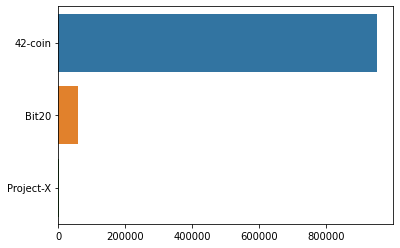

In [59]:
sns.barplot(y=currency,x = market)

# Volume

**Volume is a measure of how much of a given financial asset has been traded in a given period of time and even though so simple, it can be a powerful indicator for trading.**

In [60]:
currency  = []
volume = []


In [61]:
for i,cn in enumerate(name):
    filtered = latest_df[latest_df['name']==str(cn)]
    currency.append(str(cn))
    volume.append(filtered['volume'].values[0])

<AxesSubplot:>

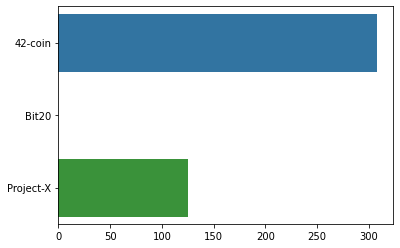

In [62]:
sns.barplot(y=currency,x = volume)

**Rising market should see rising volume. Buyers require increasing numbers and increasing enthusiasm in order to keep pushing prices higher. Increasing price and decreasing volume show lack of interest, and this is a warning of a potential reversal.The simple fact is that a price drop (or rise) on little volume is not a strong signal. A price drop (or rise) on large volume is a stronger signal that something in the stock has fundamentally changed.**

# Candlestick charts

Candlestick charts provide an easy-to-interpret picture of price action.

The filled portion of the candlestick is called the body. The lines above and below the body represent the high/low range and are called shadows (or “wicks” or “tails”). The high is marked by the top of the upper shadow and the low by the bottom of the lower shadow.

If the stock closes higher than its opening price, a hollow/green candlestick is drawn with the bottom of the body representing the opening price and the top of the body representing the closing price.

If the stock closes lower than its opening price, a filled/red candlestick is drawn with the top of the body representing the opening price and the bottom of the body representing the closing price.

In [63]:
rank = 1228
months = 6

In [64]:
latest_df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941284,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
941749,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [70]:
name = latest_df[latest_df['ranknow']==1228]['name']
name

941284    42-coin
Name: name, dtype: object

In [93]:
# Filtering six months data 

filtered_df = df[(df['ranknow']==1228) & (df['date']> (max(df['date']) - timedelta(days = 30*months))) ]

In [94]:
ohlc = filtered_df[['date','open','high','low','close']]
ohlc.head()

,date,open,high,low,close
526515,2018-06-04,0.009236,0.009473,0.007280,0.007468
526516,2018-06-05,0.007467,0.009795,0.007052,0.007881
526517,2018-06-06,0.007756,0.009235,0.005635,0.008173
526518,2018-06-07,0.008170,0.008522,0.007487,0.007678
526519,2018-06-08,0.007692,0.008825,0.007686,0.008785


In [95]:
ohlc['date'] = mdates.date2num(ohlc['date'].dt.date)

ohlc.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

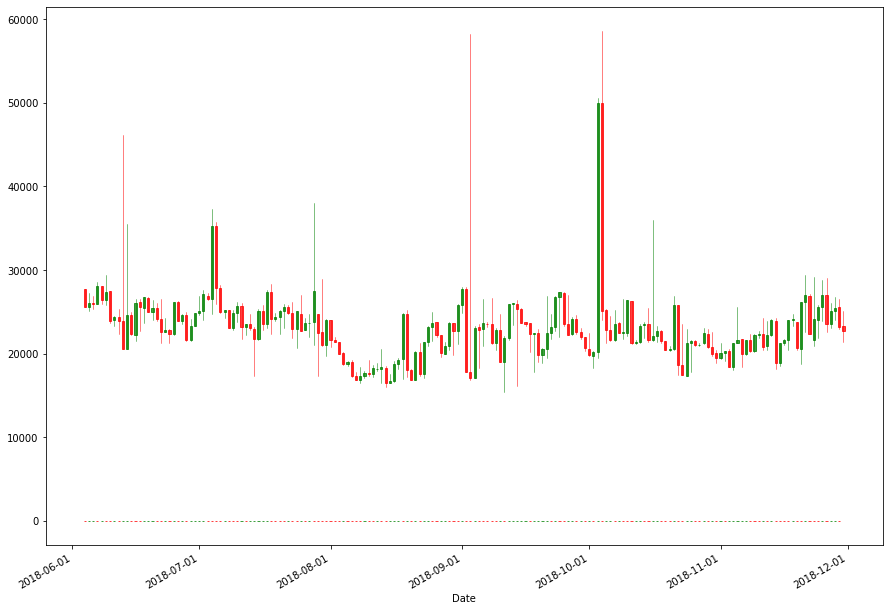

In [96]:
f,ax = plt.subplots(figsize = (15,11))
ax.xaxis_date()

candlestick_ohlc(ax,ohlc.values,width=0.5,colorup='g',colordown='r',alpha = 0.75)

plt.xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

# Moving averages

Let’s now consider how we can find trends in stocks.

Moving averages are one of the oldest and simplest tradng "tools" which we can use.

A n-day moving average is, for a series and a point in time, the average of the past n days.

Moving averages smooth a series and helps identify trends. The larger n is, the less responsive a moving average process is to short-term fluctuations in the series. The idea is that moving average processes help identify trends from “noise”.

Exponentially Weighted Moving Average is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time.

In [114]:
filtered_df = df[(df['ranknow']==1744) & (df['date']> (max(df['date']) - timedelta(days = 30*6))) ]

In [115]:
filtered_df.set_index('date',inplace = True)

In [116]:
filtered_df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2018-08-10,hycon,HYC,HYCON,1744,0.047038,0.047052,0.043352,0.043891,19141500.0,0.0,0.1457,0.00
2018-08-11,hycon,HYC,HYCON,1744,0.044030,0.045993,0.041425,0.044788,8418860.0,0.0,0.7362,0.00
2018-08-12,hycon,HYC,HYCON,1744,0.044586,0.044949,0.041547,0.041572,7505190.0,0.0,0.0073,0.00
2018-08-13,hycon,HYC,HYCON,1744,0.041660,0.041771,0.035929,0.035929,6320730.0,0.0,0.0000,0.01
2018-08-14,hycon,HYC,HYCON,1744,0.035931,0.035939,0.032122,0.033925,5042150.0,0.0,0.4724,0.00


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

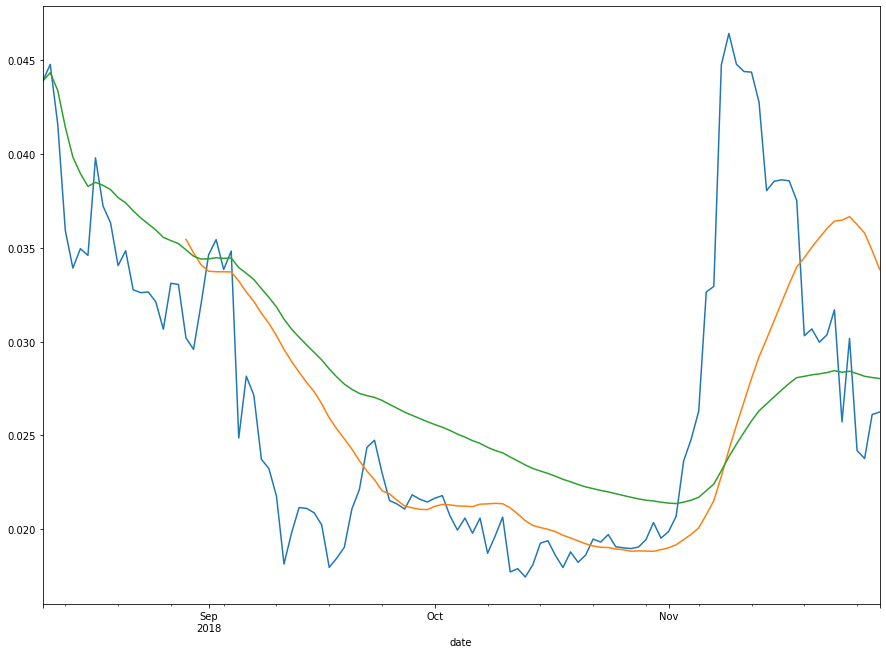

In [117]:
f,ax = plt.subplots(figsize=(15,11))

filtered_df.close.plot(label="Raw",ax=ax)
filtered_df.close.rolling(20).mean().plot(label="20 Day Moving average",ax = ax)
filtered_df.close.ewm(alpha = 0.03).mean().plot(label='Weighted moving average',ax=ax)

plt.title(name+' price with moving average')
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close price")
plt.show()